In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
 
type(apple)

pandas.core.frame.DataFrame

In [8]:
#Avg Stock Value
apple["Adj Close"].mean()

109.89705023076922

In [9]:
#Stock Volatility

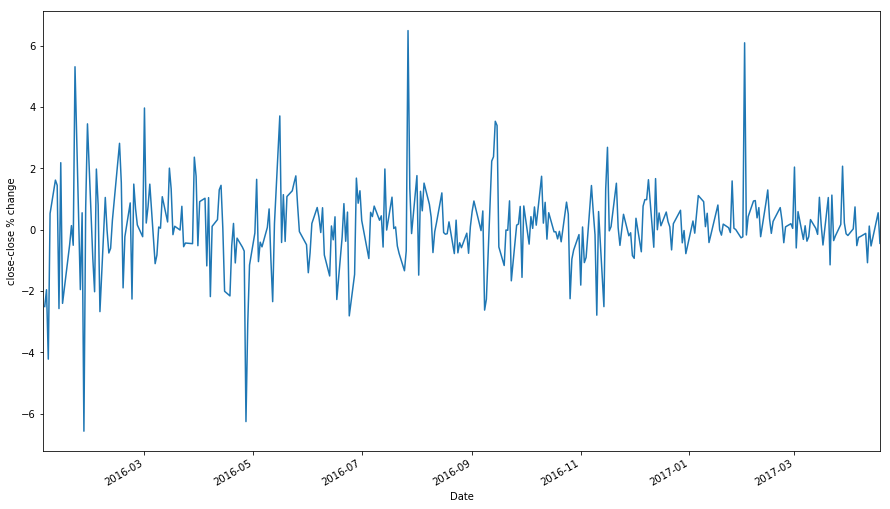

In [13]:
#Daily Stock Return
ret = apple["Adj Close"].pct_change()  # calculating returns is also easy with pandas. Just call .pct_change() 
(100*ret).plot() # plot % return
ylabel('close-close % change')

In [28]:
 # Compute daily volatility  
historical_vol_daily = np.std(ret,axis=0)  

# Convert daily volatility to annual volatility, assuming 252 trading days  
historical_vol_annually = historical_vol_daily*math.sqrt(252)  

# Return estimate of annual volatility  
print(historical_vol_annually)

0.217321742942


Linear regression

In [29]:
%matplotlib inline
import numpy as np
from pylab import *
import pandas as pd
import pandas_datareader.data as web
import datetime
import sys
import numpy as np
import scipy as sp
import pylab
from scipy.optimize import leastsq

In [31]:
import pandas as pd
import pandas_datareader.data as web
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2015,4,1)
end = datetime.datetime(2015,6,1)
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
jpm = web.DataReader("JPM", "yahoo", start, end)
spy = web.DataReader("SPY", "yahoo", start, end)

In [61]:
from sklearn.linear_model import LinearRegression
# we're using yahoo finance data, pandas datareader will import the data we need

from pandas_datareader.data import DataReader

In [59]:
symbols = ["JPM", "SPY"]
# df is the main dataframe that'll hold the Adjusted closing prices
df = pd.DataFrame()

In [63]:
for symbol in symbols:
    dftemp = DataReader(symbol,"yahoo",start)
    
    # we only need the adjusted close price.
    df[symbol] = dftemp["Adj Close"]

# lets take a look,
print df.head()

                  JPM         SPY
Date                             
2015-04-01  56.797905  197.326422
2015-04-02  57.337935  198.036303
2015-04-06  57.290564  199.369719
2015-04-07  57.650582  198.842105
2015-04-08  57.840067  199.513607


In [64]:
npMatrix = np.matrix(df)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y) # either this or the next line
#mdl = LinearRegression().fit(filtered_data[['x']],filtered_data.y)
m = mdl.coef_[0]
b = mdl.intercept_
print "formula: y = {0}x + {1}".format(m, b) # following slope intercept form

formula: y = [ 1.21354543]x + [ 125.97901614]


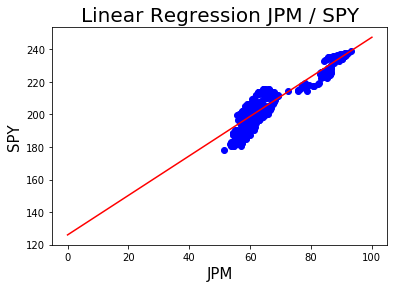

In [66]:
plt.scatter(X,Y, color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.title('Linear Regression JPM / SPY', fontsize = 20)
plt.xlabel('JPM', fontsize = 15)
plt.ylabel('SPY', fontsize = 15)
plt.show()